## Data Standardization
### The process of standardizing the data to a common format and common range

### **📌 Why Do We Standardize Data?**  
Standardization helps **scale numerical features** so that they have:  
- **Mean = 0**  
- **Standard Deviation = 1**  

🔹 **Why?**  
- **Prevents features with large values from dominating models** (e.g., salary in ₹ vs. age in years).  
- **Improves convergence speed** in ML models like logistic regression & neural networks.  
- **Essential for distance-based models** (e.g., KNN, K-Means) to avoid bias toward larger-scale features.  

🔹 **How is it done?**  
Using **Z-score normalization (Standardization formula):**  
\[
X' = \frac{X - \mu}{\sigma}
\]
Where:  
- \(X\) = original value  
- \(\mu\) = mean of the feature  
- \(\sigma\) = standard deviation  

✅ Example using `StandardScaler`:  
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
```

---

### **📌 What is Normalization?**
Normalization scales data between a fixed range, usually **[0,1]** or **[-1,1]**, without affecting the distribution shape.  

🔹 **Why?**  
- Used when features have **different scales** but are **not normally distributed** (e.g., pixel intensity in images).  
- Helps **neural networks** (especially those with sigmoid/tanh activations) by keeping values within a small range.  

🔹 **How is it done?**  
Using **Min-Max Scaling formula:**  
\[
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
\]
Where:  
- \(X\) = original value  
- \(X_{min}\) & \(X_{max}\) = minimum & maximum of feature  

✅ Example using `MinMaxScaler`:  
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
```

---

### **📌 Difference Between Standardization & Normalization**
| Feature | **Standardization** (`StandardScaler`) | **Normalization** (`MinMaxScaler`) |
|---------|------------------|------------------|
| **Definition** | Scales to mean **0** & std **1** | Scales to **[0,1]** (or [-1,1]) |
| **Formula** | \( X' = \frac{X - \mu}{\sigma} \) | \( X' = \frac{X - X_{min}}{X_{max} - X_{min}} \) |
| **Use Case** | When **data follows normal distribution** | When **data has varying scales** |
| **Effect on Outliers** | Less sensitive to outliers | **Highly affected** by outliers |

An example dataset to visualize the differences: 🚀

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1️⃣ Generate sample data (two features with different scales)
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.randint(100, 10000, 100),  # Large-scale numbers
    'Feature2': np.random.uniform(0, 1, 100)         # Small-scale numbers
})

# 2️⃣ Apply Standardization (Z-score normalization)
scaler_std = StandardScaler()
data_standardized = scaler_std.fit_transform(data)

# 3️⃣ Apply Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

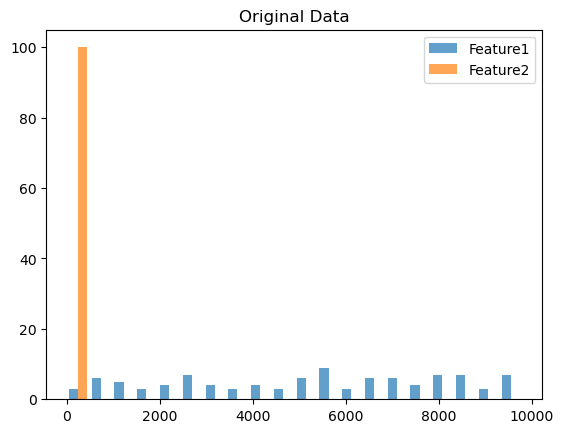

In [4]:
# Original Data
plt.hist(data, bins=20, label=data.columns, alpha=0.7)
plt.title("Original Data")
plt.legend()
plt.show()

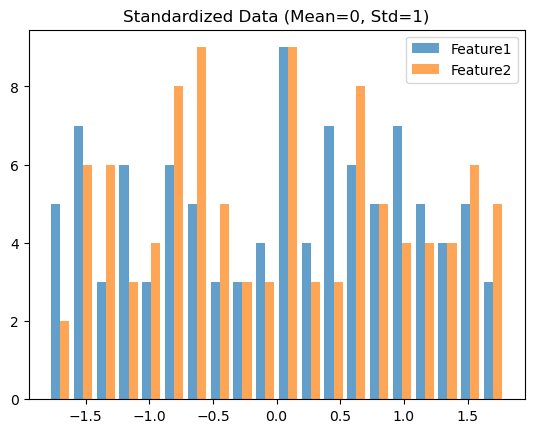

In [5]:
# Standardized Data
plt.hist(data_standardized, bins=20, label=["Feature1", "Feature2"], alpha=0.7)
plt.title("Standardized Data (Mean=0, Std=1)")
plt.legend()
plt.show()

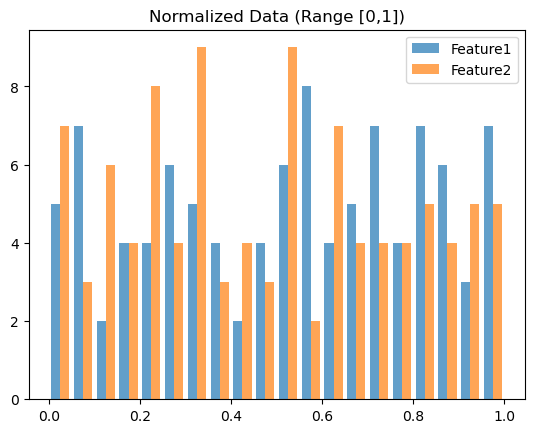

In [6]:
# Normalized Data
plt.hist(data_normalized, bins=20, label=["Feature1", "Feature2"], alpha=0.7)
plt.title("Normalized Data (Range [0,1])")
plt.legend()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# loading the dataset
dataset = sklearn.datasets.load_breast_cancer()

In [9]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [10]:
# loading the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [11]:
df.shape

(569, 30)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = df
Y = dataset.target

In [14]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [15]:
features = dataset.feature_names

In [16]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


c:\Users\Rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


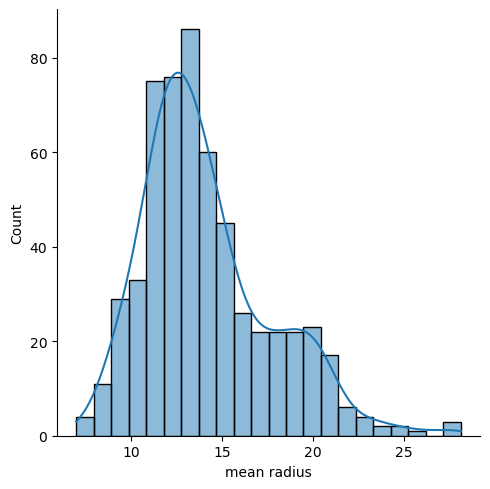

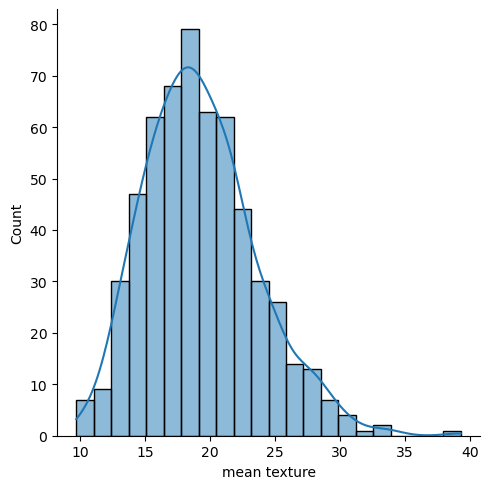

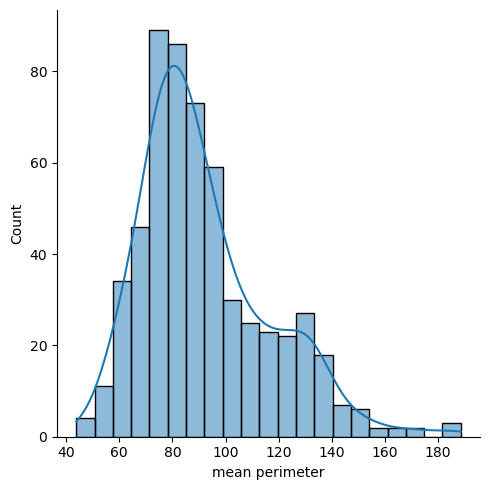

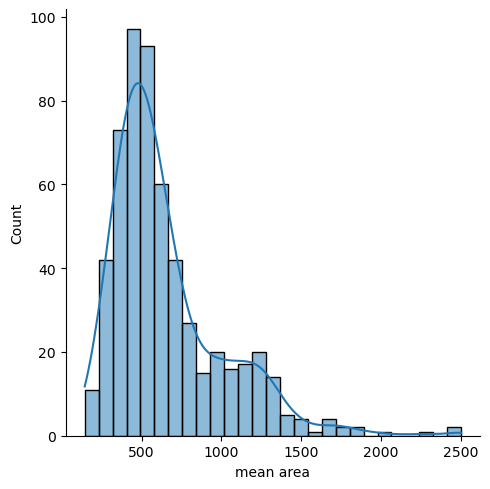

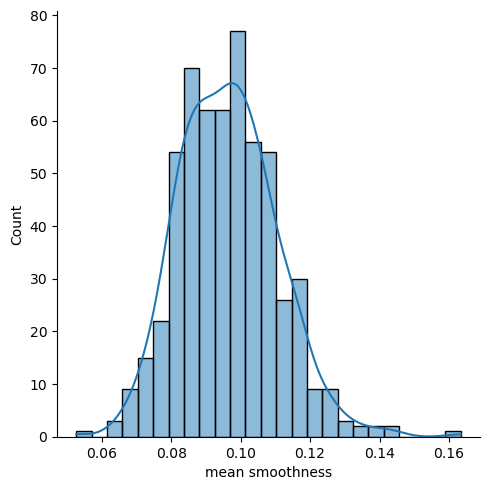

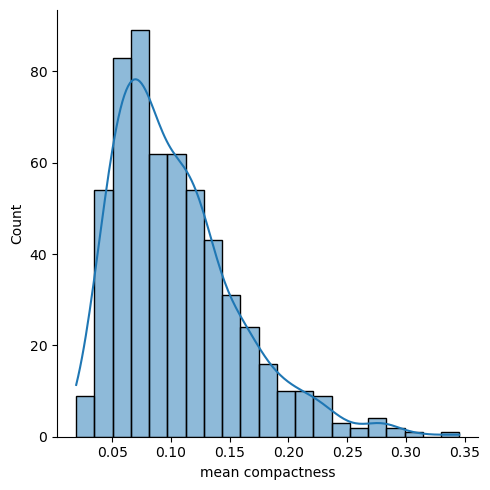

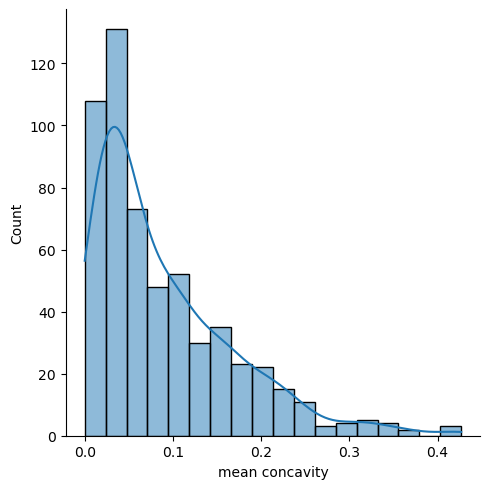

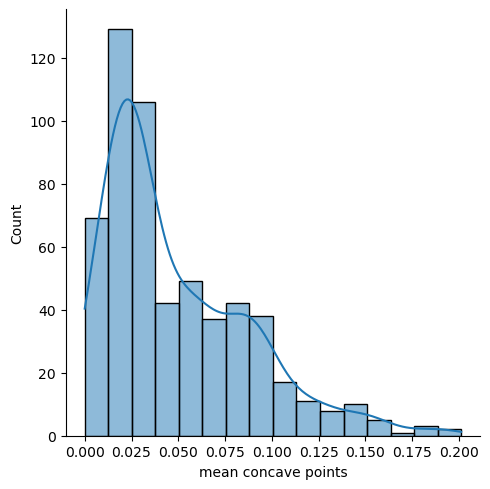

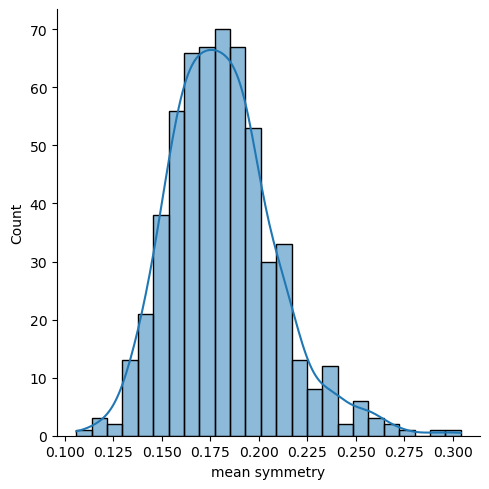

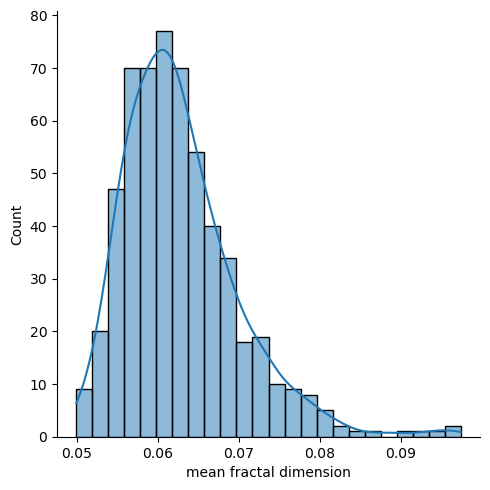

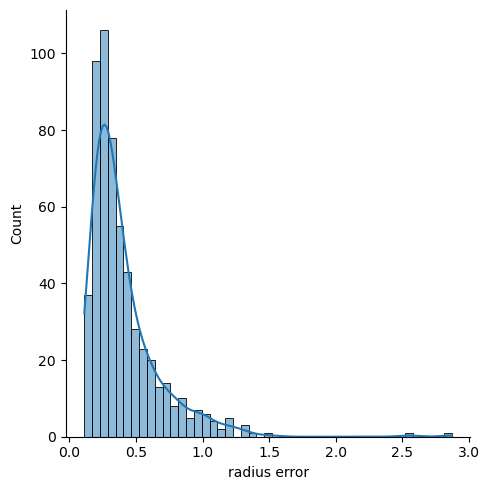

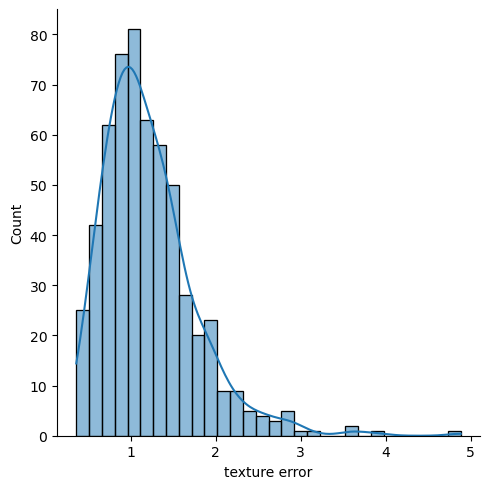

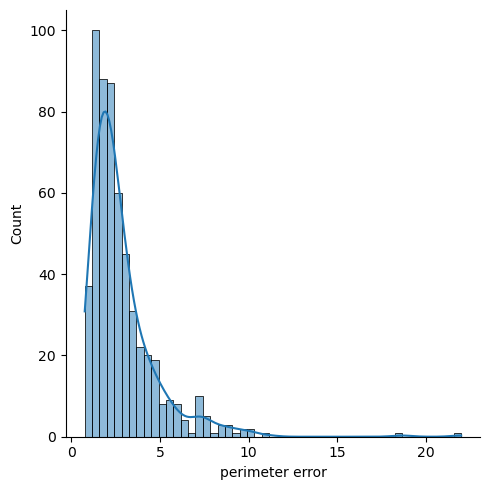

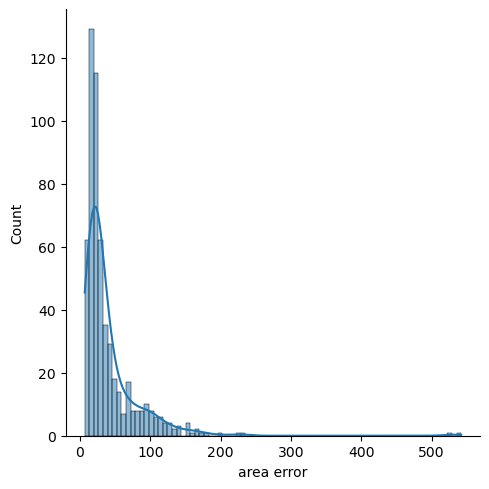

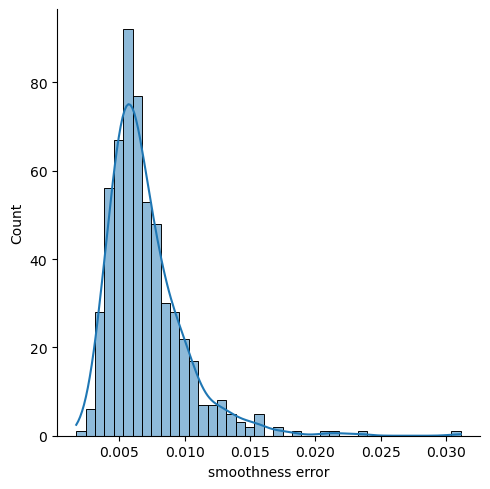

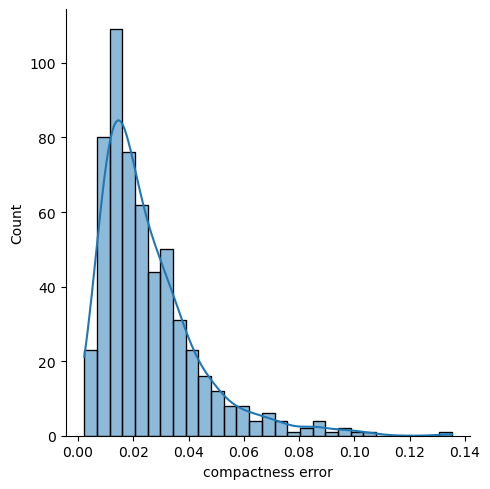

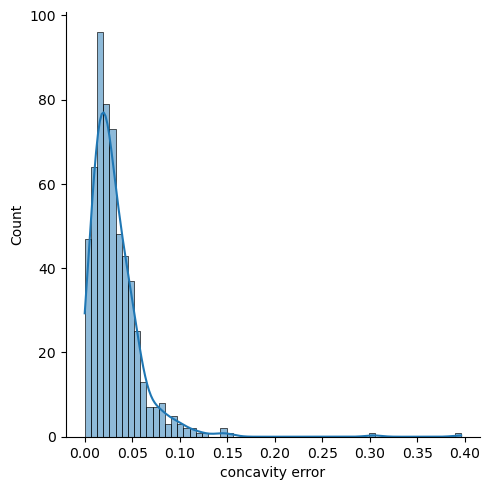

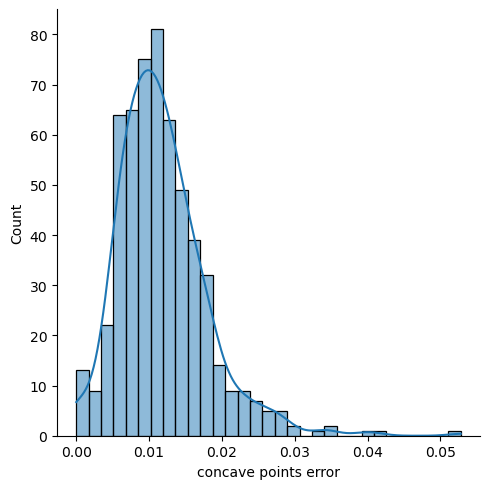

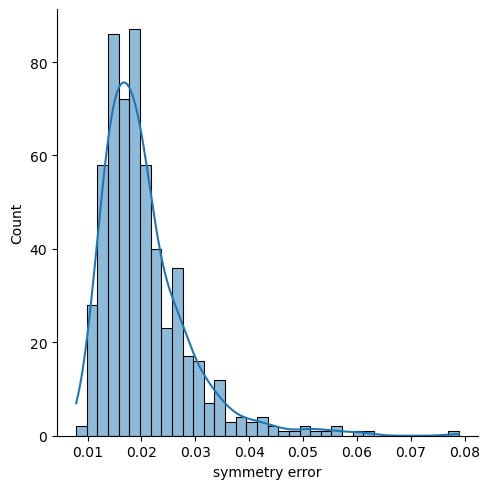

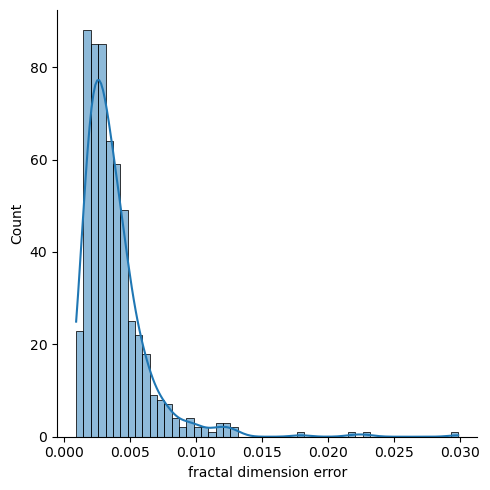

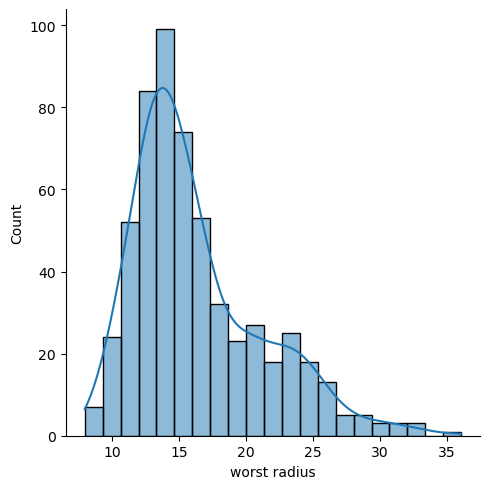

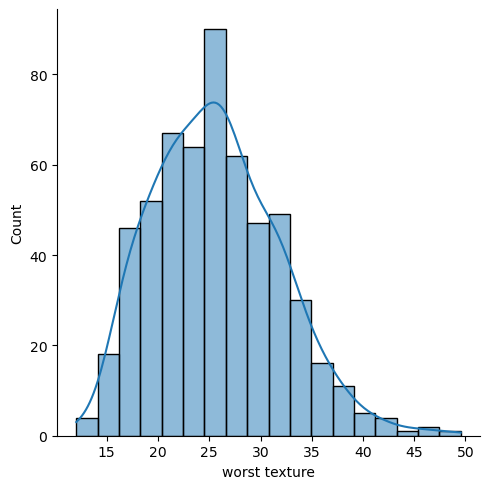

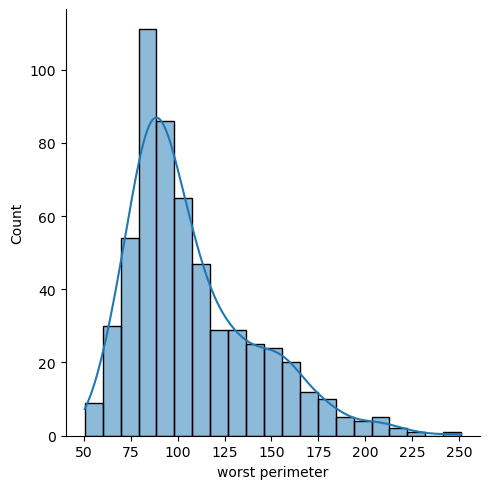

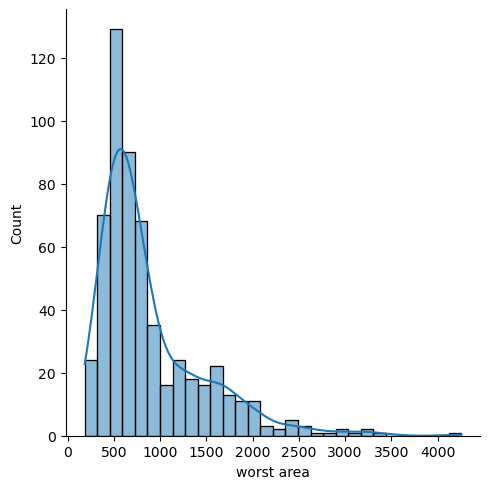

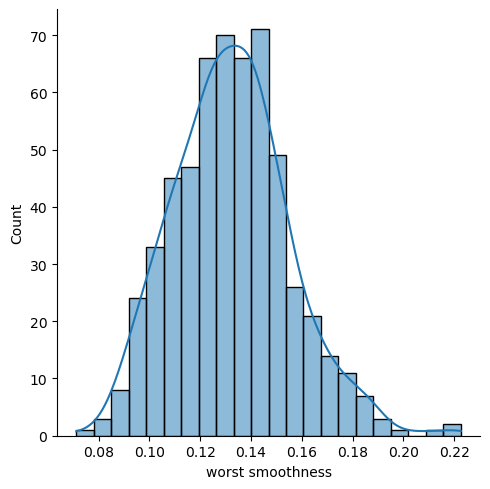

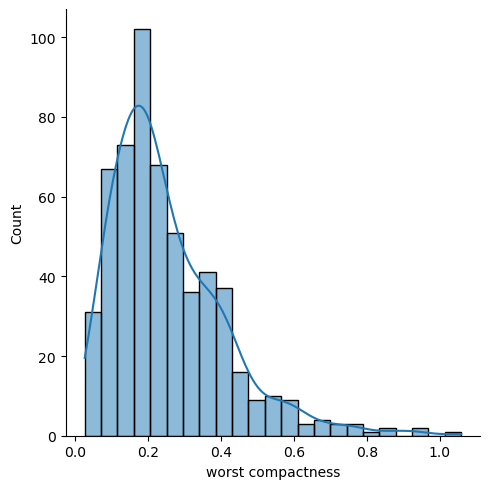

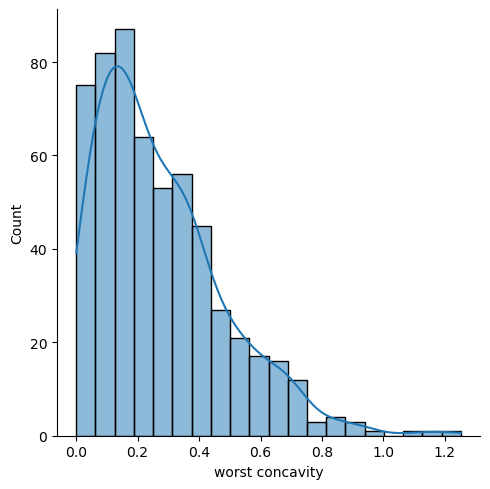

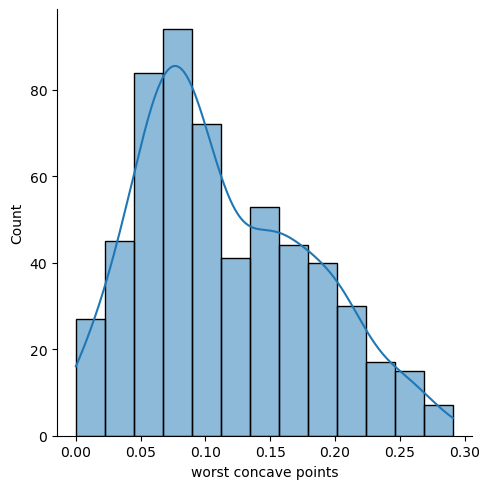

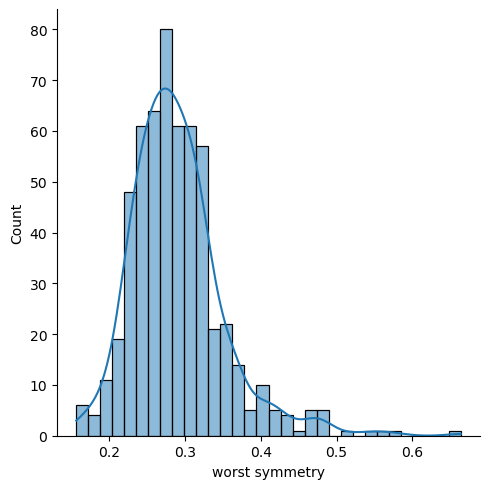

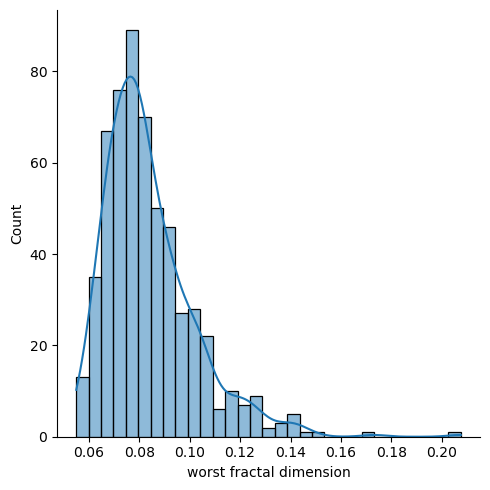

In [17]:
import seaborn as sns
for feature in features:
	sns.displot(df[feature], kde=True)

### **📌 Why Standardize Even When Features Are Not Normally Distributed?**  

✅ **Standardization is used because many ML algorithms (like SVM, Logistic Regression, and K-Means) perform better when features have similar scales, regardless of distribution.**  

---

### **📌 Key Reasons for Standardization (Even When Not Normal)**  

1️⃣ **Improves Model Performance**  
   - Many algorithms assume features are on a similar scale.  
   - Standardization **helps gradient descent converge faster** in models like Logistic Regression and Neural Networks.  

2️⃣ **Reduces Bias in Distance-Based Models**  
   - **KNN, K-Means, PCA, and SVM** use Euclidean distance.  
   - Features with larger scales can dominate models if not standardized.  

3️⃣ **Enhances Numerical Stability**  
   - Some algorithms are sensitive to **very large or very small feature values**, leading to unstable computations.  

4️⃣ **Does NOT Require Normal Distribution**  
   - **Standardization (Z-score scaling)** only ensures **mean = 0, standard deviation = 1**, not normality.  
   - It **does not force** the data into a normal distribution, unlike normalization methods like log-transform.  

---


### **📌 Key Takeaways from This Experiment**
🔹 Even though features **are not normally distributed**, standardization still **helps ML models perform better**.  
🔹 Standardization **does NOT force normality** but ensures all features have the same scale (mean=0, std=1).  
🔹 **Outliers still exist**, and transformations (log, Box-Cox) may be needed separately for highly skewed features.  


In [18]:
#Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [20]:
#Standardize the data
print(dataset.data.std())

228.29740508276657


In [21]:
scaler = StandardScaler()

## Why Do We Use scaler.fit(X_train)?
🔹 scaler.fit(X_train) calculates and stores the scaling parameters (mean & standard deviation for StandardScaler, min & max for MinMaxScaler, etc.) based on X_train.

### 📌 Why is this step needed?
1️⃣ Learns Scaling Parameters

fit() computes mean & standard deviation (for StandardScaler) or min & max (for MinMaxScaler).
These values are later used to transform data consistently.
2️⃣ Ensures Consistent Transformation

The same transformation is applied to X_train, X_test, and any future data.
We never fit on X_test! This prevents data leakage (using future data to influence model training).

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_standardized = scaler.transform(X_train)

In [24]:
print(X_train_standardized) #See the data.

[[ 1.40381088  1.79283426  1.37960065 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -0.14461158  1.07121375 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278  -0.77271123 -0.09822185 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904  0.20084323  0.89267396 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238  2.3170559   1.67987211 ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981 -1.02636686 -0.74380549 ... -0.31826862 -0.40713129
  -0.38233653]]


In [25]:
X_test_standardized = scaler.transform(X_test)

In [26]:
print(X_test_standardized)

[[-0.99455847 -0.05522817 -0.93005495 ... -0.5697545   0.02503231
  -0.50225186]
 [ 0.10656204  0.03898678  0.08315834 ... -0.32036185 -0.70933265
  -0.5692316 ]
 [-0.72278064 -0.03348626 -0.73041501 ... -0.75844367  0.17378428
  -0.12576093]
 ...
 [ 0.68654154  2.15036791  0.65326834 ...  0.36531844 -1.10548262
  -0.37639478]
 [-0.35293864 -1.46362085 -0.41837615 ... -0.95251542 -0.9629939
  -0.86523882]
 [-0.50703947 -1.02153533 -0.56445416 ... -1.03818808 -0.98021781
  -1.37352859]]


In [28]:
print(X_test_standardized.std()) #not exactly 1, but close

0.8654541077212674
